In [17]:
import pandas as pd
df=pd.read_csv("house.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [18]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Q1


In [47]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo


In [52]:
fig = px.histogram(df, x='price', nbins=33)
fig.show()

In [58]:
fig = px.histogram(df, x='sqft_living', nbins=25)
fig.show()

In [60]:
trace = go.Scatter(x=df['sqft_above'], y=df['sqft_living'], mode='markers')
data = [trace]
layout = go.Layout(title='sqft_above vs. sqft_livig',
                   xaxis=dict(title='sqft_above'),
                   yaxis=dict(title='sqft_living'))
fig = go.Figure(data=data, layout=layout)
fig.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8152\1157950695.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



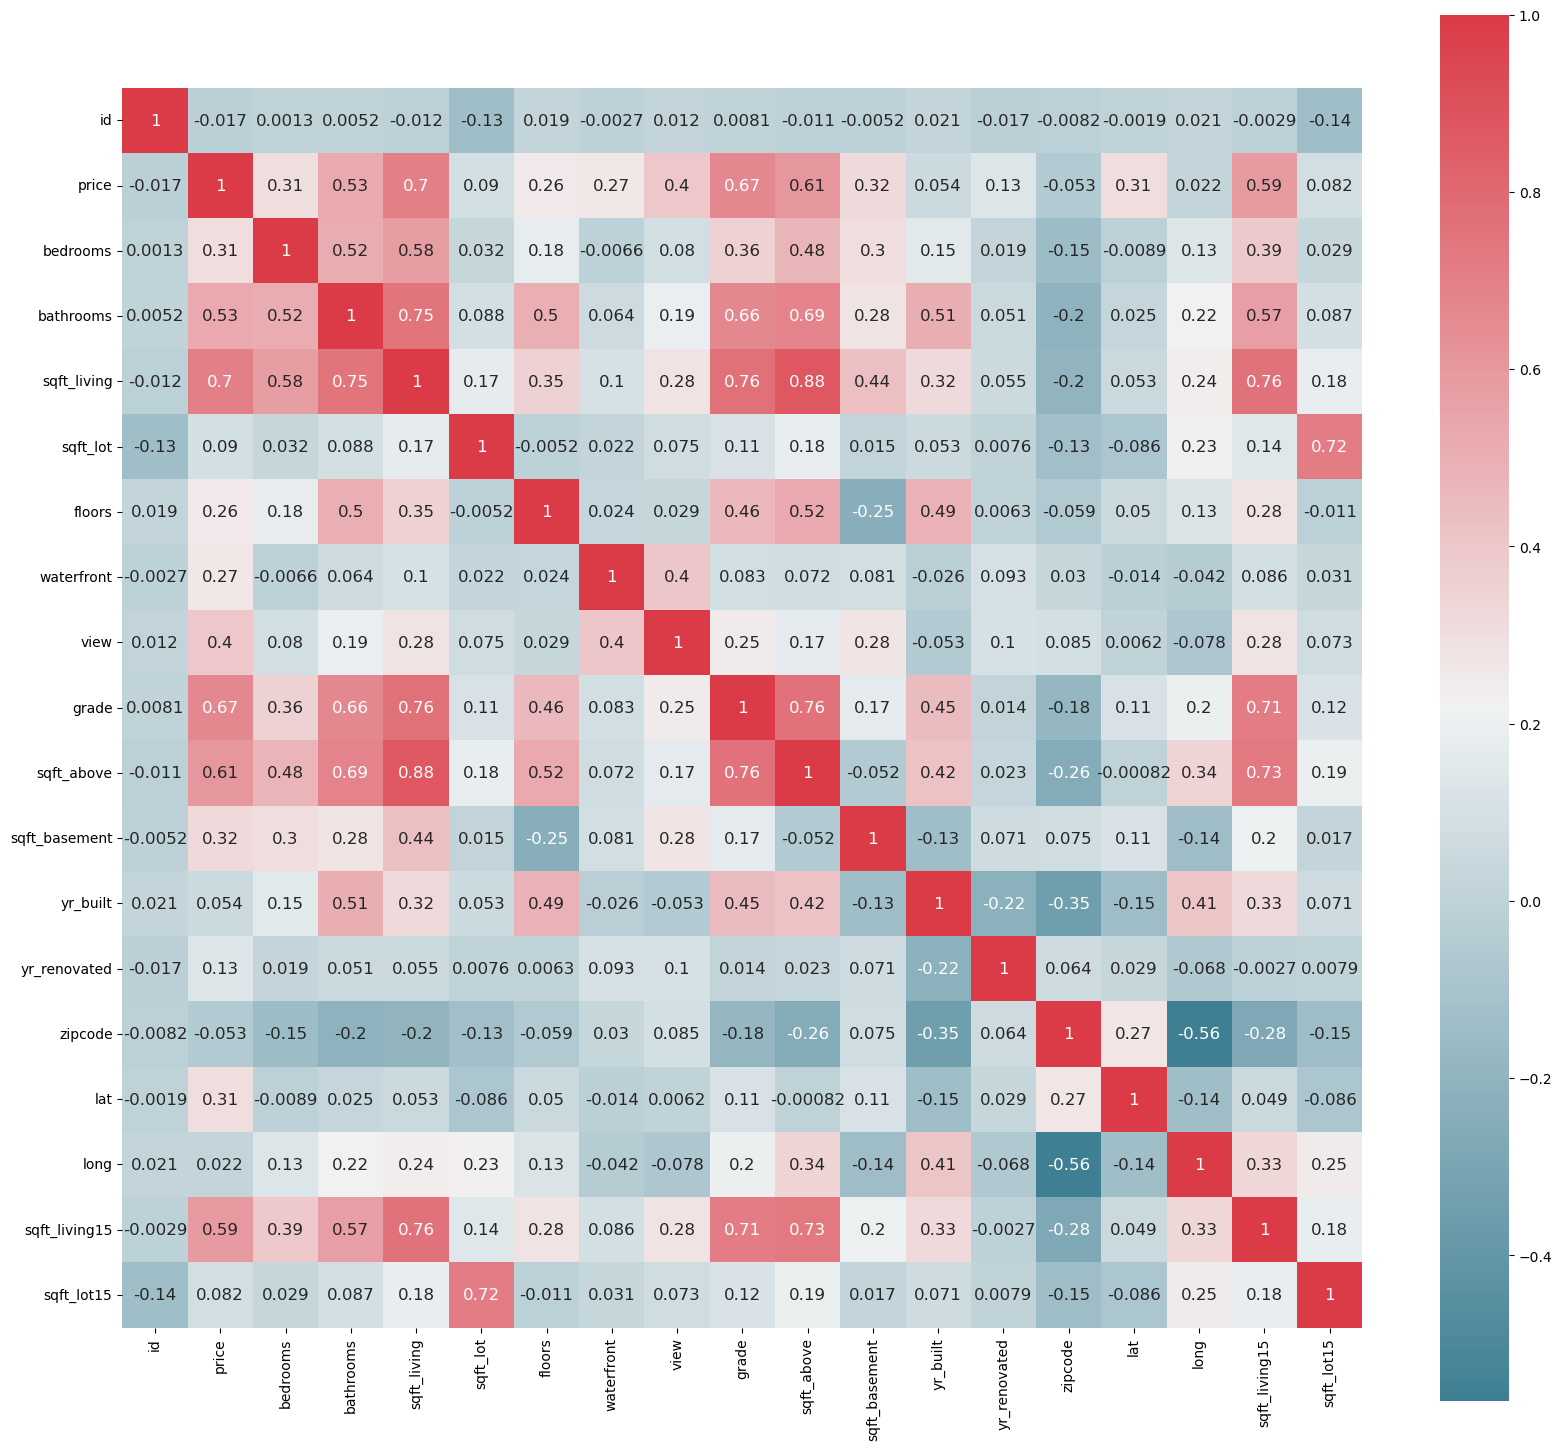

In [35]:
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df[["id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]] )

In [39]:
trace = go.Scatter(x=df['sqft_living'], y=df['price'], mode='markers')
data = [trace]
layout = go.Layout(title='sqft_living vs. Price',
                   xaxis=dict(title='sqft_living'),
                   yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [41]:
trace = go.Scatter(x=df['grade'], y=df['price'], mode='markers')
data = [trace]
layout = go.Layout(title='grade vs. Price',
                   xaxis=dict(title='grade'),
                   yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [43]:
trace = go.Scatter(x=df['sqft_above'], y=df['price'], mode='markers')
data = [trace]
layout = go.Layout(title='sqft_above vs. Price',
                   xaxis=dict(title='sqft_above'),
                   yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [45]:
trace = go.Scatter(x=df['sqft_living15'], y=df['price'], mode='markers')
data = [trace]
layout = go.Layout(title='sqft_living15 vs. Price',
                   xaxis=dict(title='sqft_living15'),
                   yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [46]:
trace = go.Scatter(x=df['bathrooms'], y=df['price'], mode='markers')
data = [trace]
layout = go.Layout(title='bathrooms vs. Price',
                   xaxis=dict(title='bathrooms'),
                   yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Q3

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=df1["sqft_living"].values[:,np.newaxis]
y=df1["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

# Q4

In [62]:
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


# Q5

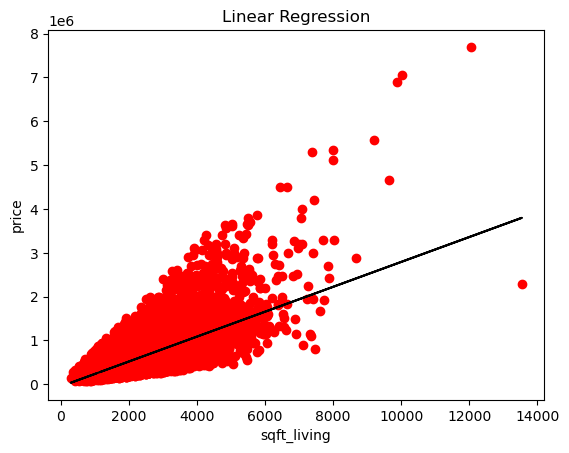

In [11]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

# Q6

In [63]:
x=df1[["sqft_living","sqft_lot"]]
y=df1["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62742250513.164314
R squared 0.500926798405561


Le résultat est meilleur que le résultat précédent 
donc l'ajout d'un autre paramètre nous a aidés à obtenir un résultat plus précis.

# Q7

In [61]:
from sklearn.preprocessing import PolynomialFeatures 
x= df1[["sqft_living"]]
y= df1["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=6) #j'ai choisis degree=6 puisque j'ai trouvé la meilleur valeur de R squared

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  57762576674.09182
R squared:  0.5405368178969807
